In [1]:
import torch
import numpy as np
# 定义前馈神经网络模型
class FeedforwardNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # 初始化权重和偏置
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.b1 = torch.zeros(hidden_size, requires_grad=True)
        self.W2 = torch.randn(hidden_size, output_size, requires_grad=True)
        self.b2 = torch.zeros(output_size, requires_grad=True)

    def forward(self, x):
        # 第一个隐藏层
        h1 = torch.relu(torch.matmul(x, self.W1) + self.b1)
        # 输出层
        out = torch.matmul(h1, self.W2) + self.b2
        return out

# 定义均方误差损失函数
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

In [2]:

# 设置参数和数据
num_inputs = 500
n_train = 7000
n_test = 3000
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05
features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

# 初始化模型参数
hidden_size = 128
output_size = 1
model = FeedforwardNN(num_inputs, hidden_size, output_size)

# 训练模型
num_epochs =10
batch_size = 100
lr = 0.005

In [3]:
import time
loss_list=[]
test_loss_list=[]
start_time = time.time()
for epoch in range(num_epochs):
    for i in range(0, n_train, batch_size):
        X = train_features[i:i + batch_size]
        y = train_labels[i:i + batch_size]

        # 前向传播
        y_pred = model.forward(X)
        loss = mean_squared_error(y_pred, y)

        # 反向传播
        loss.backward()

        # 使用随机梯度下降优化算法更新参数
        with torch.no_grad():
            model.W1 -= lr * model.W1.grad / batch_size
            model.b1 -= lr * model.b1.grad / batch_size
            model.W2 -= lr * model.W2.grad / batch_size
            model.b2 -= lr * model.b2.grad / batch_size

            # 清除梯度
            model.W1.grad.zero_()
            model.b1.grad.zero_()
            model.W2.grad.zero_()
            model.b2.grad.zero_()

#     if (epoch + 1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    loss_list.append(loss.item())

    # 测试模型
    with torch.no_grad():
        test_outputs = model.forward(test_features)
        test_loss = mean_squared_error(test_outputs, test_labels)
        print(f"Test Loss: {test_loss.item():.4f}")
        test_loss_list.append(test_loss.item())

end_time = time.time()
training_time = end_time - start_time
print("模型的training_time为"+str(round(training_time,2))+"秒" )

Epoch [1/10], Loss: 3108.8076
Test Loss: 2561.3469
Epoch [2/10], Loss: 619.8373
Test Loss: 516.9268
Epoch [3/10], Loss: 148.6017
Test Loss: 126.9625
Epoch [4/10], Loss: 39.2464
Test Loss: 34.2774
Epoch [5/10], Loss: 11.0408
Test Loss: 9.8053
Epoch [6/10], Loss: 3.2558
Test Loss: 2.9286
Epoch [7/10], Loss: 1.0047
Test Loss: 0.9159
Epoch [8/10], Loss: 0.3318
Test Loss: 0.3103
Epoch [9/10], Loss: 0.1257
Test Loss: 0.1249
Epoch [10/10], Loss: 0.0614
Test Loss: 0.0676
模型的training_time为2.98秒


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss(loss_values,title):
    """
    画损失图像的函数

    Parameters:
        loss_values (list or numpy array): 包含损失值的列表或numpy数组

    Returns:
        None
    """
    # 创建横坐标
    x = np.linspace(0, len(loss_values) - 1, len(loss_values))

    # 绘制损失图像
    plt.plot(x, loss_values, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

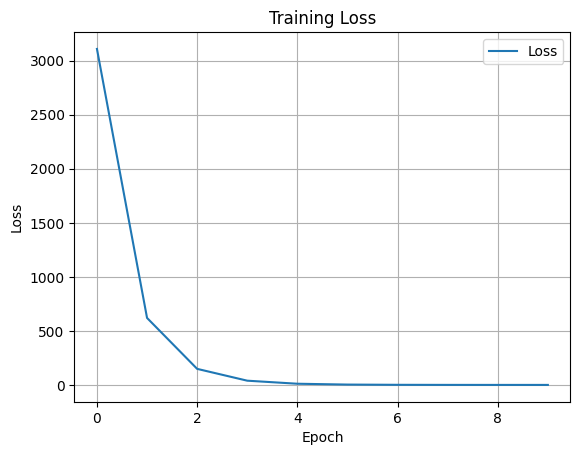

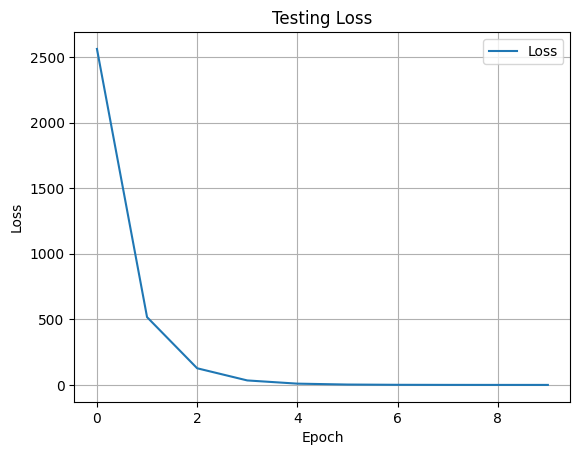

In [5]:
plot_loss(loss_list,"Training Loss")
plot_loss(test_loss_list,"Testing Loss")

# 使用前馈神经网络分别解决回归（nn）
## ①回归问题

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time

In [7]:
##利用torch.nn实现前馈神经网络解决上述回归，二分类、多分类问题
# 定义前馈神经网络模型
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [8]:
# 设置参数和初始化数据
num_inputs = 500
n_train = 7000
n_test = 3000
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05
features = torch.randn((n_train + n_test, num_inputs))#生成正态分布的[10000, 500]矩阵 特征矩阵X
labels = torch.matmul(features, true_w) + true_b  #初始化 y_hat矩阵

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
#是在标签中添加一个小的随机扰动，目的是为了在训练过程中引入一定程度的噪音，
#增加模型的鲁棒性。这种操作常用于优化算法中，特别是在使用随机梯度下降（SGD）等优化算法时。

train_features, test_features = features[:n_train, :], features[n_train:, :]
#features[:n_train, :] 表示从 features 的第 0 行（包含）开始，取前 n_train 行作为训练集。
#而 features[n_train:, :] 表示从 features 的第 n_train 行（不包含）开始，取剩余的行作为测试集。

train_labels, test_labels = labels[:n_train], labels[n_train:]
#生成y_hat的训练集和测试集

In [9]:
# 定义模型超参数
input_size = num_inputs
hidden_size = 100
output_size = 1
learning_rate = 0.01
num_epochs =3000

# 初始化模型
model = FeedforwardNN(input_size, hidden_size, output_size)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 转换数据为PyTorch的张量
train_features = torch.tensor(train_features, dtype=torch.float)
train_labels = torch.tensor(train_labels, dtype=torch.float)

/tmp/ipykernel_2033233/1797652726.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_features = torch.tensor(train_features, dtype=torch.float)
/tmp/ipykernel_2033233/1797652726.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels, dtype=torch.float)


In [10]:
start_time = time.time()
# 使用测试集评估模型
test_features = torch.tensor(test_features, dtype=torch.float)
test_labels = torch.tensor(test_labels, dtype=torch.float)


loss_list=[]
test_loss_list=[]
# 训练模型
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(train_features)
    loss = criterion(outputs, train_labels)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1) % 50 == 0:
        loss_list.append(loss.item())
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        with torch.no_grad():
            test_outputs = model(test_features)
            test_loss = criterion(test_outputs, test_labels)
            test_loss_list.append(test_loss.item())
        print(f'Test Loss: {test_loss.item():.4f}')
    

    
end_time = time.time()
training_time = end_time - start_time
print("模型的training_time为"+str(round(training_time,2))+"秒" )

/tmp/ipykernel_2033233/4109846173.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_features = torch.tensor(test_features, dtype=torch.float)
/tmp/ipykernel_2033233/4109846173.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_labels = torch.tensor(test_labels, dtype=torch.float)


Epoch [50/3000], Loss: 0.0701
Test Loss: 0.0714
Epoch [100/3000], Loss: 0.0584
Test Loss: 0.0603
Epoch [150/3000], Loss: 0.0505
Test Loss: 0.0528
Epoch [200/3000], Loss: 0.0448
Test Loss: 0.0474
Epoch [250/3000], Loss: 0.0404
Test Loss: 0.0432
Epoch [300/3000], Loss: 0.0368
Test Loss: 0.0398
Epoch [350/3000], Loss: 0.0337
Test Loss: 0.0369
Epoch [400/3000], Loss: 0.0310
Test Loss: 0.0343
Epoch [450/3000], Loss: 0.0286
Test Loss: 0.0320
Epoch [500/3000], Loss: 0.0263
Test Loss: 0.0299
Epoch [550/3000], Loss: 0.0243
Test Loss: 0.0279
Epoch [600/3000], Loss: 0.0224
Test Loss: 0.0262
Epoch [650/3000], Loss: 0.0206
Test Loss: 0.0245
Epoch [700/3000], Loss: 0.0191
Test Loss: 0.0230
Epoch [750/3000], Loss: 0.0176
Test Loss: 0.0216
Epoch [800/3000], Loss: 0.0163
Test Loss: 0.0203
Epoch [850/3000], Loss: 0.0151
Test Loss: 0.0192
Epoch [900/3000], Loss: 0.0141
Test Loss: 0.0182
Epoch [950/3000], Loss: 0.0132
Test Loss: 0.0172
Epoch [1000/3000], Loss: 0.0123
Test Loss: 0.0164
Epoch [1050/3000], L

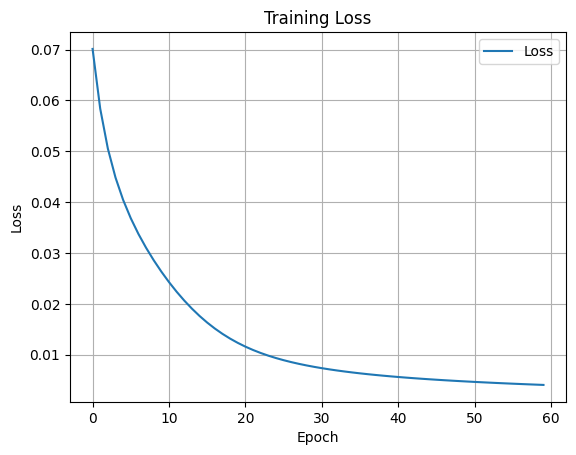

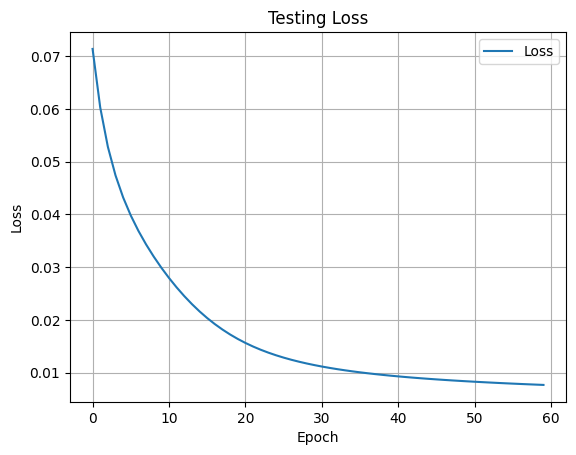

In [12]:
plot_loss(loss_list,"Training Loss")
plot_loss(test_loss_list,"Testing Loss")